In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

39 trades taken
Bull FVG Average returns: 0.66%
19 Medium sized FVGs
Medium Bull FVG Average returns: 0.78%
30 trades taken
Bear FVG Average returns: -2.19%
14 Medium sized FVGs
Medium Bear FVG Average returns: -2.43%


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,High_2prev,Bull_FVG,Bull_FVG_Val,Low_2prev,Bear_FVG,Bear_FVG_Val
Date,,,,,,,,,,,
2025-01-28,1.044506,1.045577,1.041526,1.044506,0,NaN,0,NaN,NaN,0,NaN
2025-01-29,1.042905,1.044495,1.038346,1.042905,0,NaN,0,NaN,NaN,0,NaN
2025-01-30,1.042525,1.046551,1.039134,1.042525,0,1.045577,0,-0.0,1.041526,0,0.000000
2025-01-31,1.039728,1.041233,1.036205,1.039728,0,1.044495,0,-0.0,1.038346,0,0.000000
2025-02-03,1.024779,1.032652,1.021304,1.024779,0,1.046551,0,-0.0,1.039134,1,-0.006325
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-26,1.178536,1.179941,1.176304,1.178384,0,1.180359,0,-0.0,1.176429,0,0.000000
2025-12-29,1.177274,1.178856,1.175406,1.177496,0,1.180916,0,-0.0,1.177426,0,0.000000
2025-12-30,1.177288,1.178134,1.174619,1.177302,0,1.179941,0,-0.0,1.176304,0,0.000000


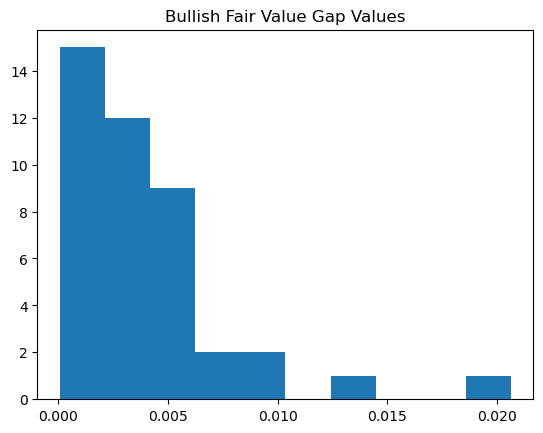

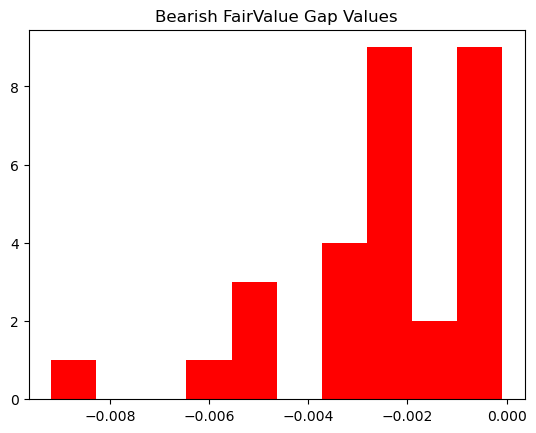

In [ ]:
ticker = 'EURUSD=X'
LOOKBACK = -240
Holding_period = 5

def get_data():
    df = yf.download(ticker, period = '30y', auto_adjust=True, interval='1d')
    df.sort_index(inplace=True)
    df.columns = df.columns.get_level_values(0)

    return df.iloc[LOOKBACK:,:]

def bull_fvg(df):

    df['High_2prev'] = df['High'].shift(2)
    df['Bull_FVG'] = (df['Low'] > df['High_2prev']).astype(int)
    df['Bull_FVG_Val'] = (df['Low'] - df['High_2prev']) * df['Bull_FVG'] / df['Close']

    fvg_subset = df[df['Bull_FVG_Val'] > 0]

    
    plt.hist(fvg_subset['Bull_FVG_Val'], bins=10)
    plt.title("Bullish Fair Value Gap Values")

    return df

def bear_fvg(df):

    df['Low_2prev'] = df['Low'].shift(2)
    df['Bear_FVG'] = (df['High'] < df['Low_2prev']).astype(int)
    df['Bear_FVG_Val'] = (df['High'] - df['Low_2prev']) * df['Bear_FVG'] / df['Close']

    fvg_subset = df[df['Bear_FVG_Val'] < 0]

    plt.figure()
    plt.hist(fvg_subset['Bear_FVG_Val'], bins=10, color='red')
    plt.title("Bearish FairValue Gap Values")

    return df

def assess_bull_FVG(df, Holding_period):

    df[f'Price_{Holding_period}_Periods'] = df["Close"].shift(-Holding_period) / df['Close']

    fvg_subset = df[df['Bull_FVG_Val'] > 0]
    print(f'{len(fvg_subset)} trades taken')
    print(f'Bull FVG Average returns: {round((fvg_subset[f'Price_{Holding_period}_Periods'].mean()-1) * 100, 2)}%')

    #dfn quantiles
    lower = fvg_subset["Bull_FVG_Val"].quantile(.25)
    upper = fvg_subset["Bull_FVG_Val"].quantile(.75)

    fvg_medium_val = fvg_subset[(fvg_subset["Bull_FVG_Val"] >= lower) & (fvg_subset["Bull_FVG_Val"] <= upper)]
    print(f'{len(fvg_medium_val)} Medium sized FVGs')
    print(f'Medium Bull FVG Average returns: {round((fvg_medium_val[f'Price_{Holding_period}_Periods'].mean()-1) * 100, 2)}%')

    return

def assess_bear_FVG(df, Holding_period):

    df[f'Price_{Holding_period}_Periods'] = df["Close"].shift(-Holding_period) / df['Close']

    fvg_subset = df[df['Bear_FVG_Val'] < 0]
    print(f'{len(fvg_subset)} trades taken')
    print(f'Bear FVG Average returns: {round((fvg_subset[f"Price_{Holding_period}_Periods"].mean()-1) * 100 * -1, 2)}%')

    #dfn quantiles
    lower = fvg_subset["Bear_FVG_Val"].quantile(.25)
    upper = fvg_subset["Bear_FVG_Val"].quantile(.75)

    fvg_medium_val = fvg_subset[(fvg_subset["Bear_FVG_Val"] >= lower) & (fvg_subset["Bear_FVG_Val"] <= upper)]
    print(f'{len(fvg_medium_val)} Medium sized FVGs')
    print(f'Medium Bear FVG Average returns: {round((fvg_medium_val[f'Price_{Holding_period}_Periods'].mean()-1) * 100 *-1, 2)}%')

    return 

assess_bull_FVG(df, Holding_period)
assess_bear_FVG(df, Holding_period)


def main():
    df = get_data()
    df = bull_fvg(df)
    df = bear_fvg(df)

    return df

df = main()
df